In [1]:
import pandas as pd 
import os 
import sys

sys.path.insert(0, os.getcwd() + '/code')
from viz import animate_play
from helper_functions import compute_orientation, face2face

In [2]:
df_game = pd.read_csv("data/games.csv")
df_tracking = pd.read_csv("data/week1.csv")
df_play = pd.read_csv("data/plays.csv")
df_players = pd.read_csv("data/players.csv")
df_pffScoutingData = pd.read_csv("data/pffScoutingData.csv")

In [3]:
df_tracking = compute_orientation(df_tracking)
print(df_tracking.head())

       gameId  playId    nflId  frameId                     time  \
0  2021090900      97  25511.0        1  2021-09-10T00:26:31.100   
1  2021090900      97  25511.0        2  2021-09-10T00:26:31.200   
2  2021090900      97  25511.0        3  2021-09-10T00:26:31.300   
3  2021090900      97  25511.0        4  2021-09-10T00:26:31.400   
4  2021090900      97  25511.0        5  2021-09-10T00:26:31.500   

   jerseyNumber team playDirection      x      y     s     a   dis       o  \
0          12.0   TB         right  37.77  24.22  0.29  0.30  0.03  165.16   
1          12.0   TB         right  37.78  24.22  0.23  0.11  0.02  164.33   
2          12.0   TB         right  37.78  24.24  0.16  0.10  0.01  160.24   
3          12.0   TB         right  37.73  24.25  0.15  0.24  0.06  152.13   
4          12.0   TB         right  37.69  24.26  0.25  0.18  0.04  148.33   

      dir event       o_x       o_y  
0   84.99  None  0.256121 -0.966645  
1   92.87  None  0.270096 -0.962833  
2   68.5

In [4]:
animate_play(df_tracking,df_play,df_players,df_pffScoutingData,
                2021090900,
                97,
                displayZone = True,
                displayOrientations = True).show()

/Users/nmiguens/Library/Python/3.8/lib/python/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.

/Users/nmiguens/Library/Python/3.8/lib/python/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



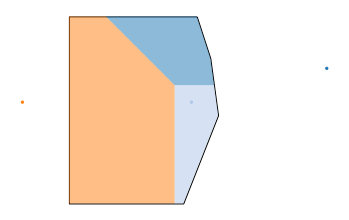

In [4]:
from geovoronoi import voronoi_regions_from_coords, points_to_coords
import numpy as np 
from shapely.geometry import Polygon
from scipy.spatial import Voronoi, ConvexHull

boundary = np.array([[41.55, 26.89],
 [37.77, 26.89],
 [37.77, 21.36],
 [41.15, 21.36],
 [42.18, 23.97],
 [41.95, 25.66]]
)

region_polys, region_pts = voronoi_regions_from_coords(np.array([[40.395, 24.355],[41.395, 24.355], [41.395, 25.355]]), Polygon(boundary))

import matplotlib.pyplot as plt
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area

fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, Polygon(boundary), region_polys, np.array([[36.395, 24.355],[41.395, 24.355], [45.395, 25.355]]), region_pts)
plt.show()

In [5]:
for i in region_polys.values() :
    print(i.exterior.xy)

(array('d', [41.95, 42.00133135503363, 42.00138547702126, 42.18, 42.05955621301775, 40.895, 38.86, 39.25274111282844, 41.55, 41.95]), array('d', [25.66, 25.2828261304051, 25.282428451452514, 23.97, 24.855, 24.855, 26.89, 26.89, 26.89, 25.66]))
(array('d', [42.05955621301775, 42.18, 41.17596740688817, 41.15, 41.14609041501976, 40.895, 40.895, 42.05955621301775]), array('d', [24.855, 23.97, 21.425800904833125, 21.36, 21.36, 21.36, 24.855, 24.855]))
(array('d', [37.77, 38.522666666666666, 38.86, 40.895, 40.895, 40.67933333333334, 37.77, 37.77]), array('d', [26.89, 26.89, 26.89, 24.855, 21.36, 21.36, 21.36, 26.89]))
